In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
col_list = ["graph_type", "nodes", "edges", "greatest_time", "strongly_connected", "path_length"]
graph_results = pd.read_csv("../wico_graph_results.csv", usecols = col_list)

## Labeling data

misinformation = 1, non misinformation = 0

In [4]:
mis_idx = graph_results.loc[graph_results.graph_type.str.contains("Other") | graph_results.graph_type.str.contains("5G")].index
non_mis_idx = graph_results.loc[graph_results.graph_type.str.contains("Non_Conspiracy")].index

graph_results.loc[mis_idx, "misinformation"] = int(1)
graph_results.loc[non_mis_idx, "misinformation"] = int(0)

col_list.append("misinformation")

## Initial EDA

In [5]:
graph_results

,graph_type,nodes,edges,greatest_time,strongly_connected,path_length,misinformation
0,data/wico-graph/Other_Graphs/,6,10,44342918,1,1,1.0
1,data/wico-graph/Other_Graphs/,37,116,8625727,10,1,1.0
2,data/wico-graph/Other_Graphs/,99,484,233185,17,1,1.0
3,data/wico-graph/Other_Graphs/,7,16,7253092,2,1,1.0
4,data/wico-graph/Other_Graphs/,39,45,221492,34,1,1.0
...,...,...,...,...,...,...,...
3506,data/wico-graph/Non_Conspiracy_Graphs/,93,168,890342,60,1,0.0
3507,data/wico-graph/Non_Conspiracy_Graphs/,26,61,65126,14,1,0.0
3508,data/wico-graph/Non_Conspiracy_Graphs/,6,6,92746,3,0,0.0
3509,data/wico-graph/Non_Conspiracy_Graphs/,50,116,48696,11,1,0.0


### Number of Nodes

<AxesSubplot:xlabel='misinformation'>

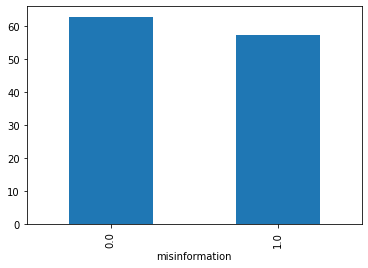

In [6]:
graph_results.groupby("misinformation").nodes.mean().plot.bar()

### Number of Edges

<AxesSubplot:xlabel='misinformation'>

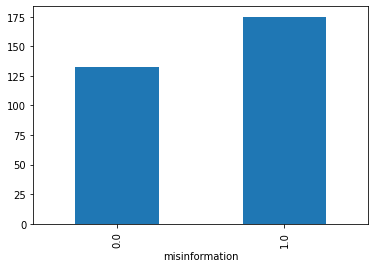

In [7]:
graph_results.groupby("misinformation").edges.mean().plot.bar()

### Number of Strongly Connected Components

<AxesSubplot:xlabel='misinformation'>

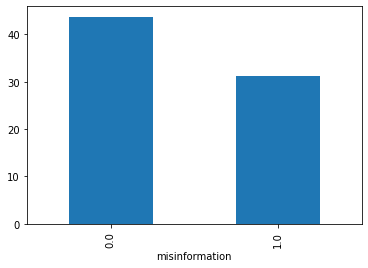

In [8]:
graph_results.groupby("misinformation").strongly_connected.mean().plot.bar()

### Greatest Retweet Time

<AxesSubplot:xlabel='misinformation'>

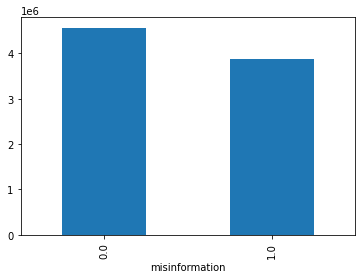

In [9]:
graph_results.groupby("misinformation").greatest_time.mean().plot.bar()

### Path length from greatest retweet time to source node if one existed

<AxesSubplot:xlabel='misinformation'>

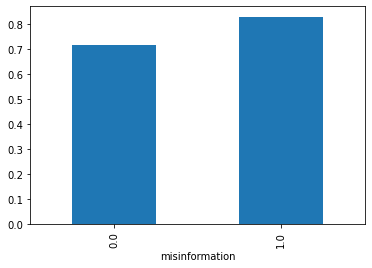

In [10]:
graph_results.groupby("misinformation").path_length.mean().plot.bar()

### Percent of graphs of each path length

<AxesSubplot:>

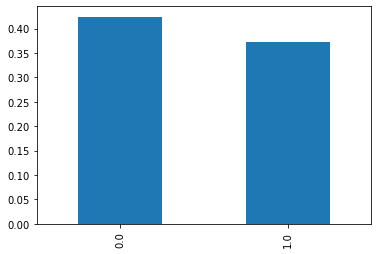

In [11]:
percent_no_path = graph_results.loc[graph_results.path_length == 0].misinformation.value_counts() / graph_results.misinformation.value_counts()
percent_no_path.plot.bar()

<AxesSubplot:>

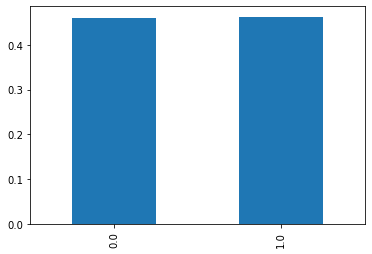

In [12]:
percent_1 = graph_results.loc[graph_results.path_length == 1].misinformation.value_counts() / graph_results.misinformation.value_counts()
percent_1.plot.bar()

<AxesSubplot:>

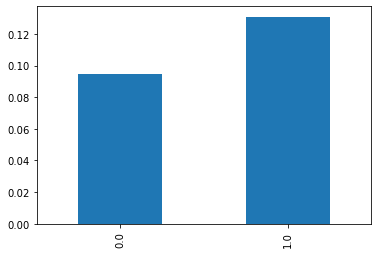

In [13]:
percent_2 = graph_results.loc[graph_results.path_length == 2].misinformation.value_counts() / graph_results.misinformation.value_counts()
percent_2.plot.bar()

<AxesSubplot:>

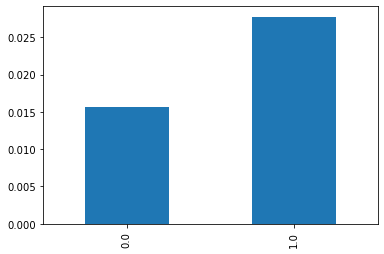

In [14]:
percent_3 = graph_results.loc[graph_results.path_length == 3].misinformation.value_counts() / graph_results.misinformation.value_counts()
percent_3.plot.bar()

## Correlation Matrix 

(strongly connected components was the biggest correlation with misinformation)

In [15]:
graph_results.corr()

,nodes,edges,greatest_time,strongly_connected,path_length,misinformation
nodes,1.000000,0.315946,0.161626,0.786590,-0.102510,-0.072402
edges,0.315946,1.000000,0.057473,-0.130693,0.145493,0.071568
greatest_time,0.161626,0.057473,1.000000,0.068345,-0.016373,-0.025019
strongly_connected,0.786590,-0.130693,0.068345,1.000000,-0.234425,-0.189006
path_length,-0.102510,0.145493,-0.016373,-0.234425,1.000000,0.067887
misinformation,-0.072402,0.071568,-0.025019,-0.189006,0.067887,1.000000


## Seperating large dataset into subsets

In [16]:
other_results = graph_results[graph_results.graph_type.str.contains("Other")]
covid_results = graph_results[graph_results.graph_type.str.contains("5G")]
non_results = graph_results[graph_results.graph_type.str.contains("Non_Conspiracy")]


## All subgraphs Nodes versus Edges

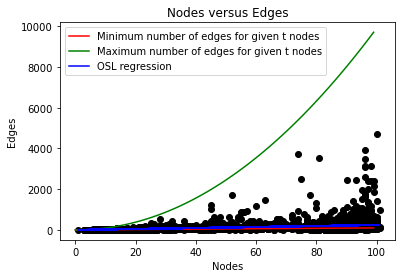

In [17]:
t = np.arange(0, 100, 1)
nodes_lim = t - 1
nodes_max = t * (t-1)
p = np.polyfit(graph_results["nodes"],graph_results["edges"], 2)
x_ = graph_results["nodes"]

plt.figure()
plt.title("Nodes versus Edges")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.scatter(graph_results["nodes"], graph_results["edges"], c='k')
plt.plot(t, nodes_lim, 'r', label = "Minimum number of edges for given t nodes")
plt.plot(t, nodes_max, 'g', label = "Maximum number of edges for given t nodes")
plt.plot(x_, p[0] * x_ ** 2 + p[1] * x_ + p[2], 'b', label = "OSL regression")
plt.legend()
plt.plot()
plt.show()

## Nodes versus Edges of subsets

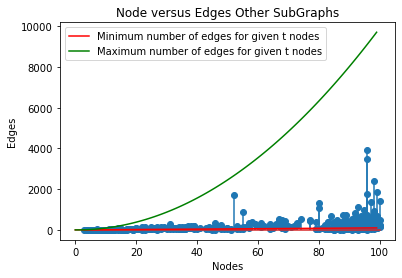

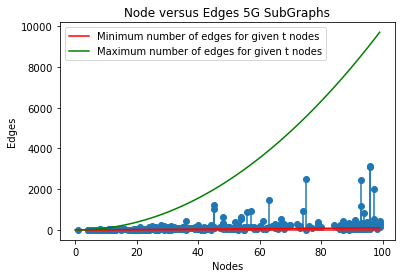

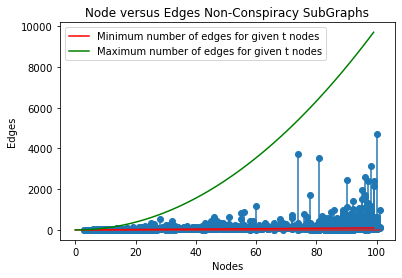

In [18]:

plt.figure()
plt.title("Node versus Edges Other SubGraphs")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.stem(other_results["nodes"], other_results["edges"], use_line_collection=True)
plt.plot(t, nodes_lim, 'r', label = "Minimum number of edges for given t nodes")
plt.plot(t, nodes_max, 'g', label = "Maximum number of edges for given t nodes")
plt.legend()
plt.show()

plt.figure()
plt.title("Node versus Edges 5G SubGraphs")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.stem(covid_results["nodes"], covid_results["edges"], use_line_collection=True)
plt.plot(t, nodes_lim, 'r', label = "Minimum number of edges for given t nodes")
plt.plot(t, nodes_max, 'g', label = "Maximum number of edges for given t nodes")
plt.legend()
plt.show()

plt.figure()
plt.title("Node versus Edges Non-Conspiracy SubGraphs")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.stem(non_results["nodes"], non_results["edges"], use_line_collection=True)
plt.plot(t, nodes_lim, 'r', label = "Minimum number of edges for given t nodes")
plt.plot(t, nodes_max, 'g', label = "Maximum number of edges for given t nodes")
plt.legend()
plt.show()



## For presentation

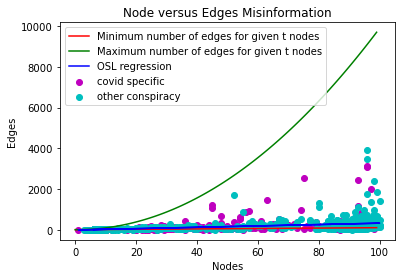

In [19]:
p = np.polyfit(graph_results.loc[mis_idx, "nodes"],graph_results.loc[mis_idx, "edges"], 2)
plt.figure()
plt.title("Node versus Edges Misinformation")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.scatter(covid_results["nodes"], covid_results["edges"], c='m', label="covid specific")
plt.scatter(other_results["nodes"], other_results["edges"], c='c', label="other conspiracy")
plt.plot(t, nodes_lim, 'r', label = "Minimum number of edges for given t nodes")
plt.plot(t, nodes_max, 'g', label = "Maximum number of edges for given t nodes")
x1 = graph_results.loc[mis_idx, "nodes"]
plt.plot(x1, p[0] * x1 ** 2 + p[1] * x1 + p[2], 'b', label = "OSL regression")
plt.legend()
plt.show()

## Strongly Connected Graphs

Nodes versus SCC

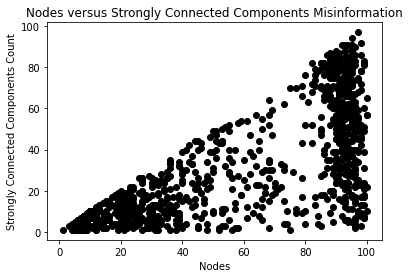

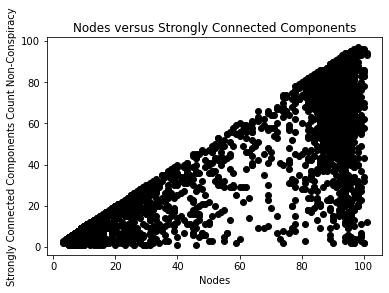

In [20]:
plt.figure()
plt.xlabel("Nodes")
plt.ylabel("Strongly Connected Components Count")
plt.title("Nodes versus Strongly Connected Components Misinformation")
plt.scatter(graph_results.loc[mis_idx, "nodes"], graph_results.loc[mis_idx, "strongly_connected"], c='k')
plt.show()

plt.figure()
plt.xlabel("Nodes")
plt.ylabel("Strongly Connected Components Count Non-Conspiracy")
plt.title("Nodes versus Strongly Connected Components")
plt.scatter(graph_results.loc[non_mis_idx, "nodes"], graph_results.loc[non_mis_idx, "strongly_connected"], c='k')
plt.show()

Strongly Connected versus Nodes


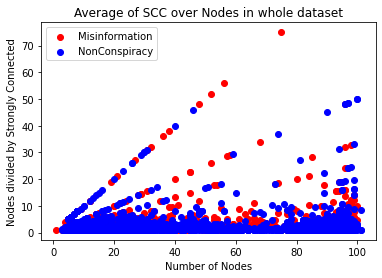

In [21]:
plt.figure()
plt.xlabel("Number of Nodes")
plt.ylabel("Nodes divided by Strongly Connected")
plt.title("Average of SCC over Nodes in whole dataset")
plt.scatter(graph_results.loc[mis_idx, "nodes"], graph_results.loc[mis_idx, "nodes"] / graph_results.loc[mis_idx, "strongly_connected"], c='r', label = "Misinformation")
plt.scatter(non_results["nodes"], non_results["nodes"] / non_results["strongly_connected"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

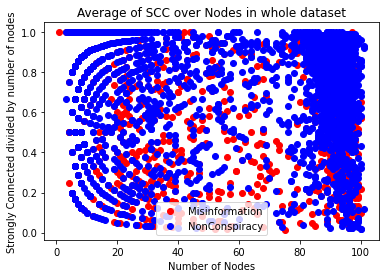

In [22]:
plt.figure()
plt.xlabel("Number of Nodes")
plt.ylabel("Strongly Connected divided by number of nodes")
plt.title("Average of SCC over Nodes in whole dataset")
plt.scatter(graph_results.loc[mis_idx, "nodes"], graph_results.loc[mis_idx, "strongly_connected"] / graph_results.loc[mis_idx, "nodes"], c='r', label = "Misinformation")
plt.scatter(non_results["nodes"], non_results["strongly_connected"] / non_results["nodes"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

Index versus SCC

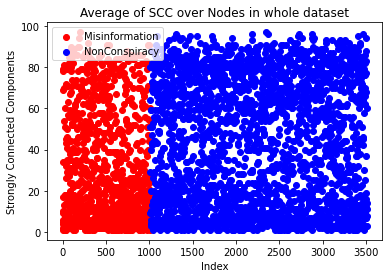

In [23]:
x2 = np.arange(0, 1009, 1)
x3 = np.arange(1010, 3512, 1)
plt.figure()
plt.xlabel("Index")
plt.ylabel("Strongly Connected Components")
plt.title("Average of SCC over Nodes in whole dataset")
plt.scatter(x2, graph_results.loc[mis_idx, "strongly_connected"], c='r', label = "Misinformation")
plt.scatter(x3, non_results["strongly_connected"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

Index versus Nodes divided by SCC

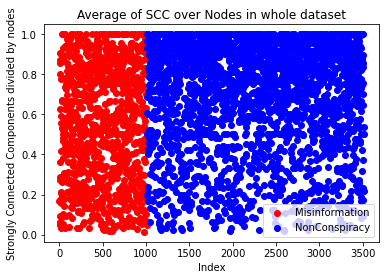

In [24]:

plt.figure()
plt.xlabel("Index")
plt.ylabel("Strongly Connected Components divided by nodes")
plt.title("Average of SCC over Nodes in whole dataset")
plt.scatter(x2, graph_results.loc[mis_idx, "strongly_connected"] / graph_results.loc[mis_idx, "nodes"], c='r', label = "Misinformation")
plt.scatter(x3, non_results["strongly_connected"] / non_results["nodes"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

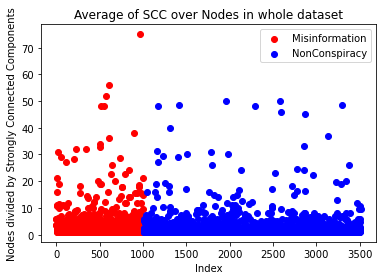

In [25]:
plt.figure()
plt.xlabel("Index")
plt.ylabel("Nodes divided by Strongly Connected Components")
plt.title("Average of SCC over Nodes in whole dataset")
plt.scatter(x2, graph_results.loc[mis_idx, "nodes"] / graph_results.loc[mis_idx, "strongly_connected"], c='r', label = "Misinformation")
plt.scatter(x3, non_results["nodes"] / non_results["strongly_connected"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

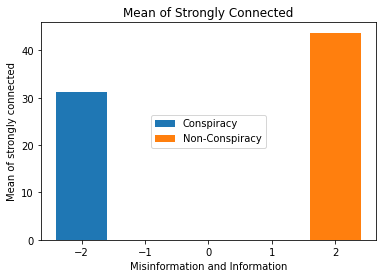

In [26]:
plt.figure()
plt.xlabel("Misinformation and Information")
plt.ylabel("Mean of strongly connected")
plt.title("Mean of Strongly Connected")
plt.bar(-2,graph_results.loc[mis_idx, "strongly_connected"].mean(), label="Conspiracy")
plt.bar(2,non_results["strongly_connected"].mean(), label="Non-Conspiracy")
plt.legend(loc = "center")
plt.show()

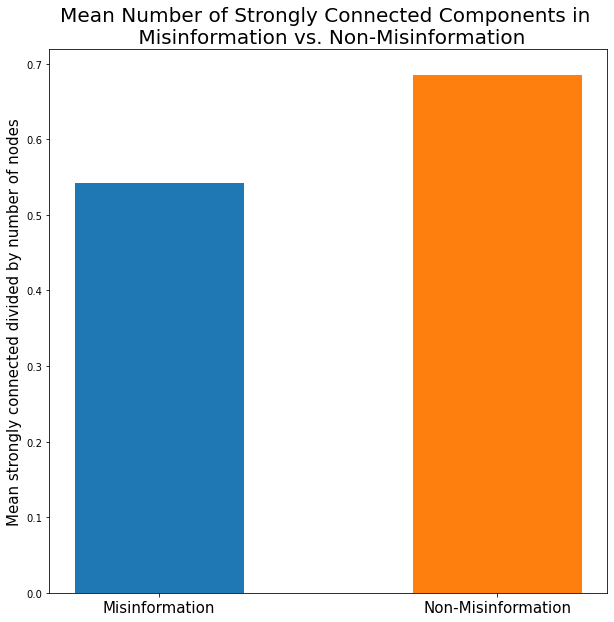

In [64]:
plt.figure(figsize=(10,10))
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.ylabel("Mean strongly connected divided by number of nodes")
plt.title("Mean Number of Strongly Connected Components in \n Misinformation vs. Non-Misinformation")
plt.bar("Misinformation",(graph_results.loc[mis_idx, "strongly_connected"] / graph_results.loc[mis_idx, "nodes"]).mean(), width=.5)
plt.bar("Non-Misinformation",(non_results["strongly_connected"] / non_results["nodes"]).mean(), label="Non-Misinformation", width=.5)
plt.show()

Shortest Path

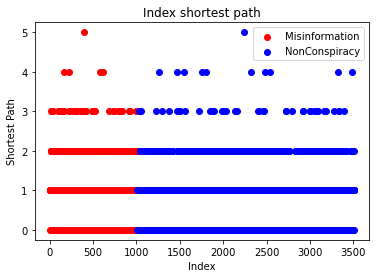

In [29]:
plt.figure()
plt.xlabel("Index")
plt.ylabel("Shortest Path")
plt.title("Index shortest path")
plt.scatter(x2, graph_results.loc[mis_idx, "path_length"], c='r', label = "Misinformation")
plt.scatter(x3, non_results["path_length"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

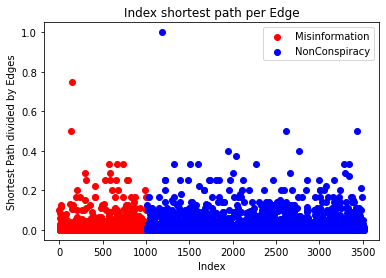

In [30]:
plt.figure()
plt.xlabel("Index")
plt.ylabel("Shortest Path divided by Edges")
plt.title("Index shortest path per Edge")
plt.scatter(x2, graph_results.loc[mis_idx, "path_length"] / graph_results.loc[mis_idx, "edges"], c='r', label = "Misinformation")
plt.scatter(x3, non_results["path_length"] / non_results["edges"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

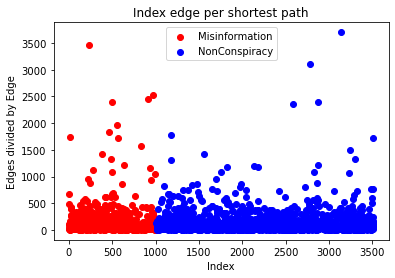

In [31]:
plt.figure()
plt.xlabel("Index")
plt.ylabel("Edges divided by Edge")
plt.title("Index edge per shortest path")
plt.scatter(x2, graph_results.loc[mis_idx, "edges"] / graph_results.loc[mis_idx, "path_length"], c='r', label = "Misinformation")
plt.scatter(x3, non_results["edges"] / non_results["path_length"], c='b', label = "NonConspiracy")
plt.legend()
plt.show()

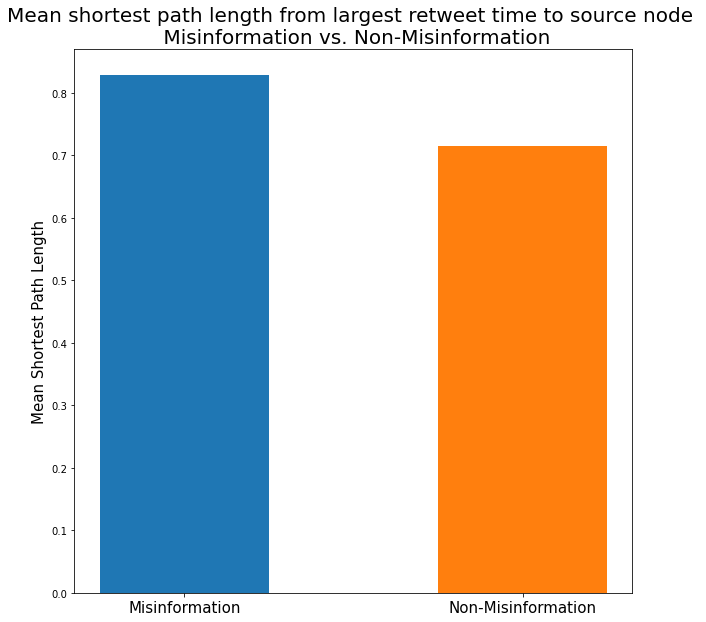

In [69]:
plt.figure(figsize=(10,10))
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.ylabel("Mean Shortest Path Length")
plt.title("Mean shortest path length from largest retweet time to source node \n Misinformation vs. Non-Misinformation")
plt.bar("Misinformation",graph_results.loc[mis_idx, "path_length"].mean(), width=.5)
plt.bar("Non-Misinformation",non_results["path_length"].mean(), width=.5)
plt.show()

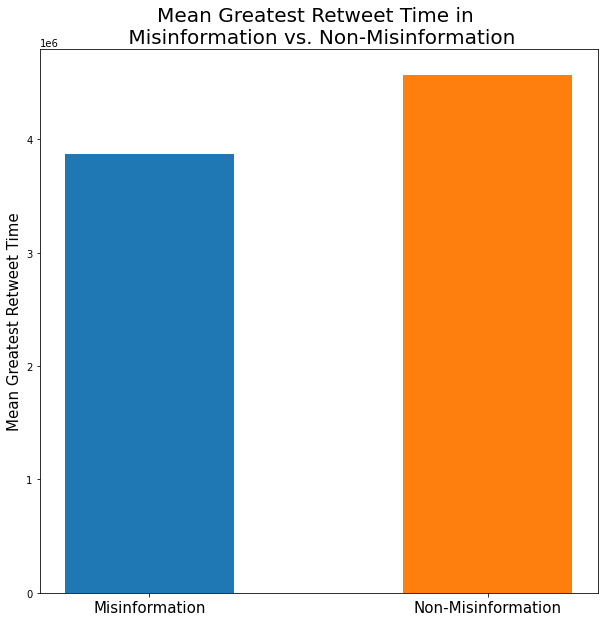

In [75]:
plt.figure(figsize=(10,10))
plt.rc('font', size=15) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=15) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.ylabel("Mean Greatest Retweet Time")
plt.title("Mean Greatest Retweet Time in \n Misinformation vs. Non-Misinformation")
plt.bar("Misinformation",graph_results.loc[mis_idx, "greatest_time"].mean(), width=.5)
plt.bar("Non-Misinformation",non_results.greatest_time.mean(), label="Non-Misinformation", width=.5)
plt.show()

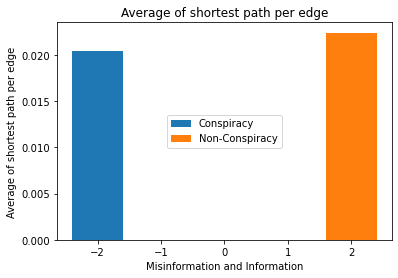

In [33]:
plt.figure()
plt.xlabel("Misinformation and Information")
plt.ylabel("Average of shortest path per edge")
plt.title("Average of shortest path per edge")
plt.bar(-2,(graph_results.loc[mis_idx, "path_length"] / graph_results.loc[mis_idx, "edges"]).mean(), label="Conspiracy")
plt.bar(2,(non_results["path_length"] / non_results["edges"]).mean(), label="Non-Conspiracy")
plt.legend(loc = "center")
plt.show()